# 22024.01.13토

# np.meshgrid np.megrid np.ogrid

## np.meshgrid

In [6]:
import numpy as np
import pandas as pd

In [7]:

np.meshgrid?

Signature: np.meshgrid(*xi, copy=True, sparse=False, indexing='xy')
Docstring:
Return coordinate matrices from coordinate vectors.

Make N-D coordinate arrays for vectorized evaluations of
N-D scalar/vector fields over N-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.

.. versionchanged:: 1.9
   1-D and 0-D cases are allowed.

Parameters
----------
x1, x2,..., xn : array_like
    1-D arrays representing the coordinates of a grid.
indexing : {'xy', 'ij'}, optional
    Cartesian ('xy', default) or matrix ('ij') indexing of output.
    See Notes for more details.

    .. versionadded:: 1.7.0
sparse : bool, optional
    If True the shape of the returned coordinate array for dimension *i*
    is reduced from ``(N1, ..., Ni, ... Nn)`` to
    ``(1, ..., 1, Ni, 1, ..., 1)``.  These sparse coordinate grids are
    intended to be use with :ref:`basics.broadcasting`.  When all
    coordinates are used in an expression, broadcasting still leads to a
    fully-dimensonal result arr

In [8]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
x

array([0. , 0.5, 1. ])

In [9]:
y = np.linspace(0, 1, ny)
y

array([0., 1.])

In [10]:
np.meshgrid(x, y)

[array([[0. , 0.5, 1. ],
        [0. , 0.5, 1. ]]),
 array([[0., 0., 0.],
        [1., 1., 1.]])]

In [11]:
xv, yv = np.meshgrid(x, y)
xv

array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

In [12]:
yv

array([[0., 0., 0.],
       [1., 1., 1.]])

In [13]:
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'retina'

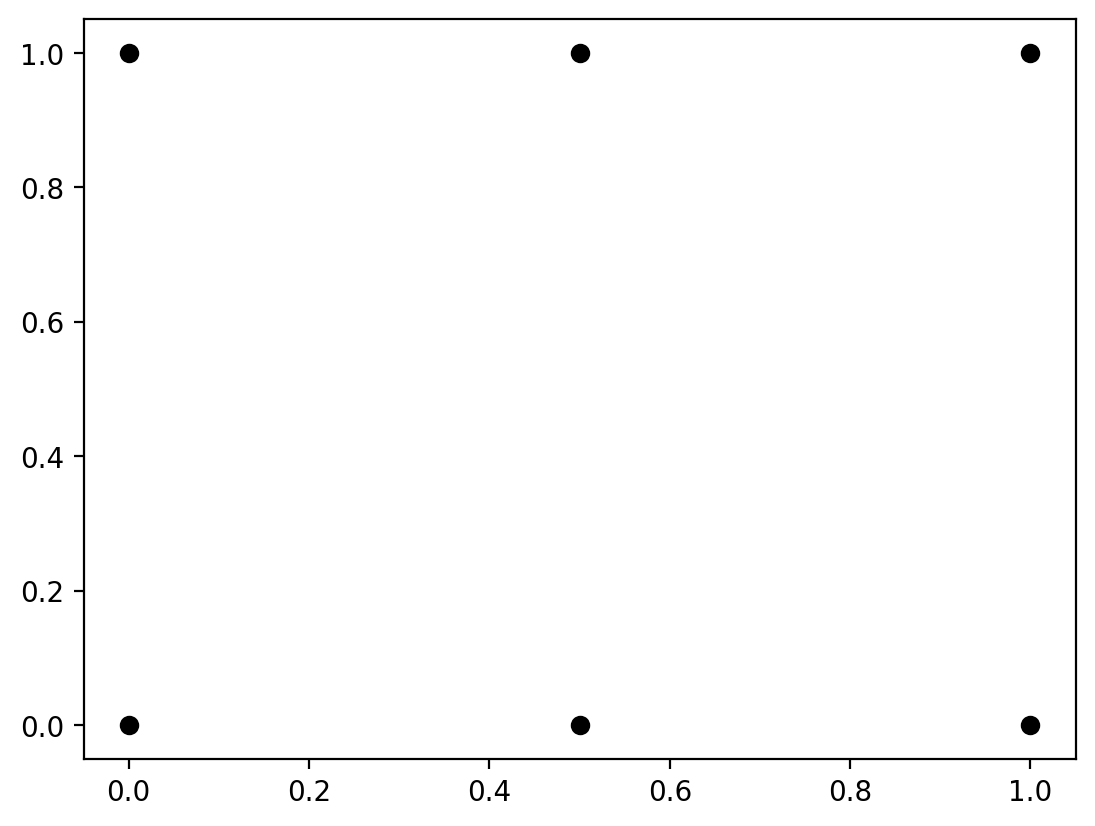

In [14]:
import matplotlib.pyplot as plt
plt.plot(xv, yv, marker='o', color='k', linestyle='none')
plt.show()

In [26]:
x = np.linspace(0, 1, 3)
y = np.linspace(0, 1, 2)
np.meshgrid(x, y, sparse=False)

[array([[0. , 0.5, 1. ],
        [0. , 0.5, 1. ]]),
 array([[0., 0., 0.],
        [1., 1., 1.]])]

In [20]:
x = np.linspace(0, 1, 3)
y = np.linspace(0, 1, 2)
xv, yv = np.meshgrid(x, y, sparse=True)
xv

array([[0. , 0.5, 1. ]])

In [21]:
yv

array([[0.],
       [1.]])

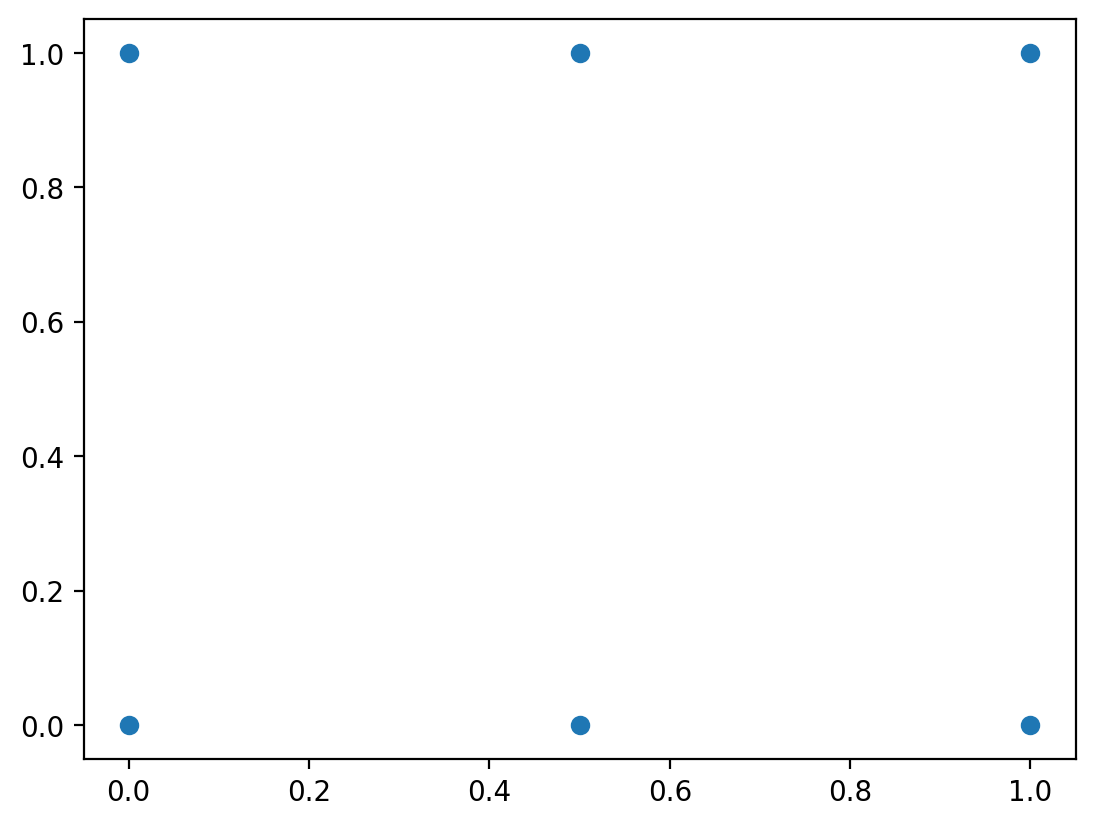

In [29]:
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 3)
y = np.linspace(0, 1, 2)
xv, yv = np.meshgrid(x, y)
plt.scatter(xv, yv)
plt.show()

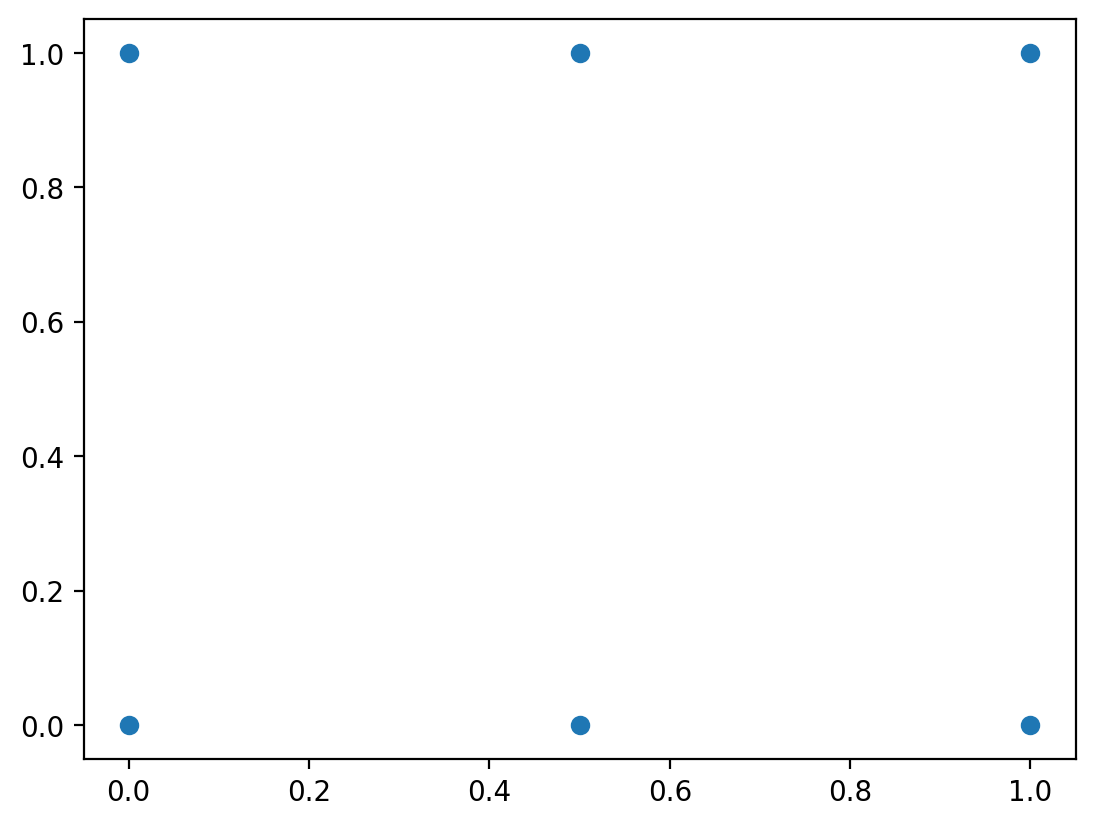

In [30]:
import matplotlib.pyplot as plt

xv, yv = np.mgrid[0:1:3j, 0:1:2j][0], np.mgrid[0:1:3j, 0:1:2j][1]
plt.scatter(xv, yv)
plt.show()

In [23]:
np.mgrid[0:1:3j, 0:1:2j]

array([[[0. , 0. ],
        [0.5, 0.5],
        [1. , 1. ]],

       [[0. , 1. ],
        [0. , 1. ],
        [0. , 1. ]]])

In [31]:
x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)
# full coordinate arrays
xx, yy = np.meshgrid(x, y)
zz = np.sqrt(xx**2 + yy**2)
xx.shape, yy.shape, zz.shape

((101, 101), (101, 101), (101, 101))

In [32]:
# sparse coordinate arrays
xs, ys = np.meshgrid(x, y, sparse=True)
xs, ys

(array([[-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
         -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
         -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
         -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
         -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
          0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
          1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
          2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
          3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
          4.9,  5. ]]),
 array([[-5. ],
        [-4.9],
        [-4.8],
        [-4.7],
        [-4.6],
        [-4.5],
        [-4.4],
        [-4.3],
        [-4.2],
        [-4.1],
        [-4. ],
        [-3.9],
        [-3.8],
        [-3.7],
        [-3.6],
        [-3.5],
        [-3.4],
        [-3.3],
        [-3.2

In [33]:
zs = np.sqrt(xs**2 + ys**2)
xs.shape, ys.shape, zs.shape

((1, 101), (101, 1), (101, 101))

In [34]:
np.array_equal(zz, zs)

True

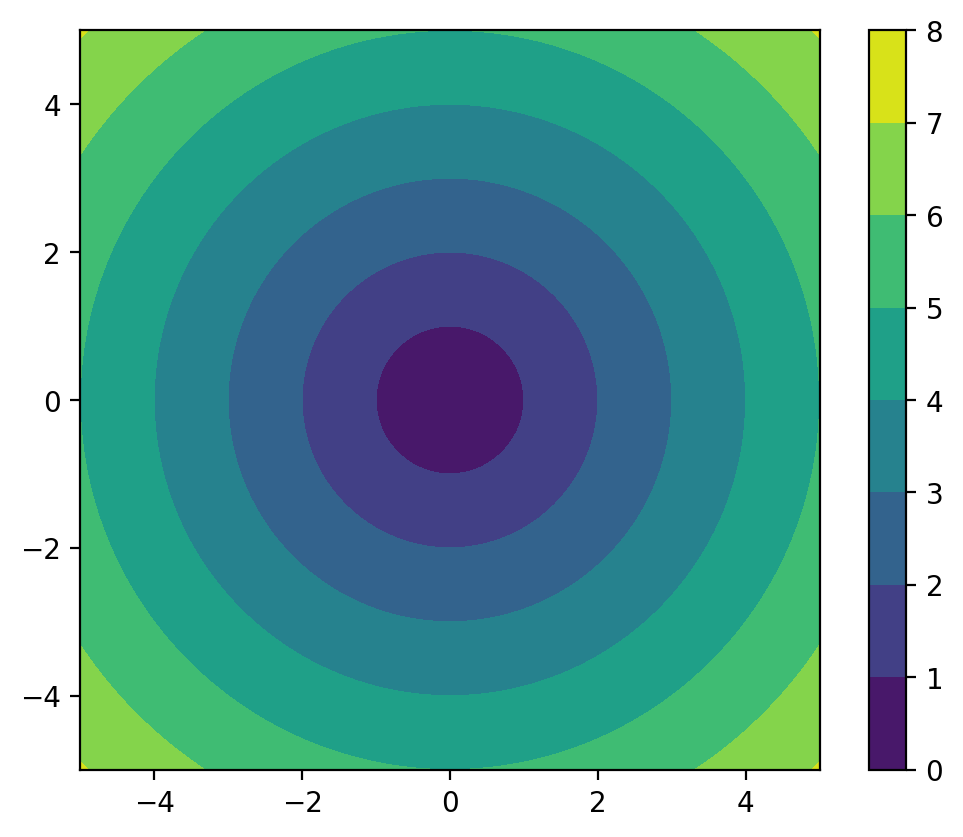

In [35]:
h = plt.contourf(x, y, zs)
# h = plt.contourf(x, y)
plt.axis('scaled')
plt.colorbar()
plt.show()

## plt.contourf

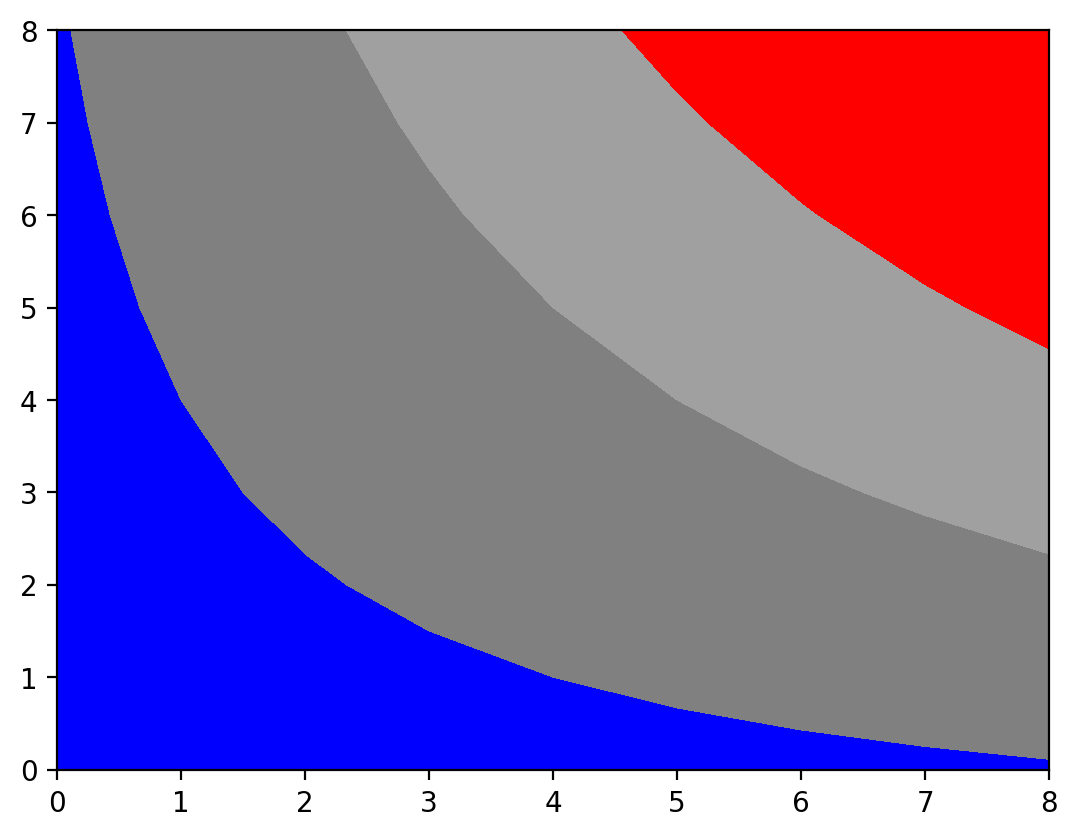

In [47]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

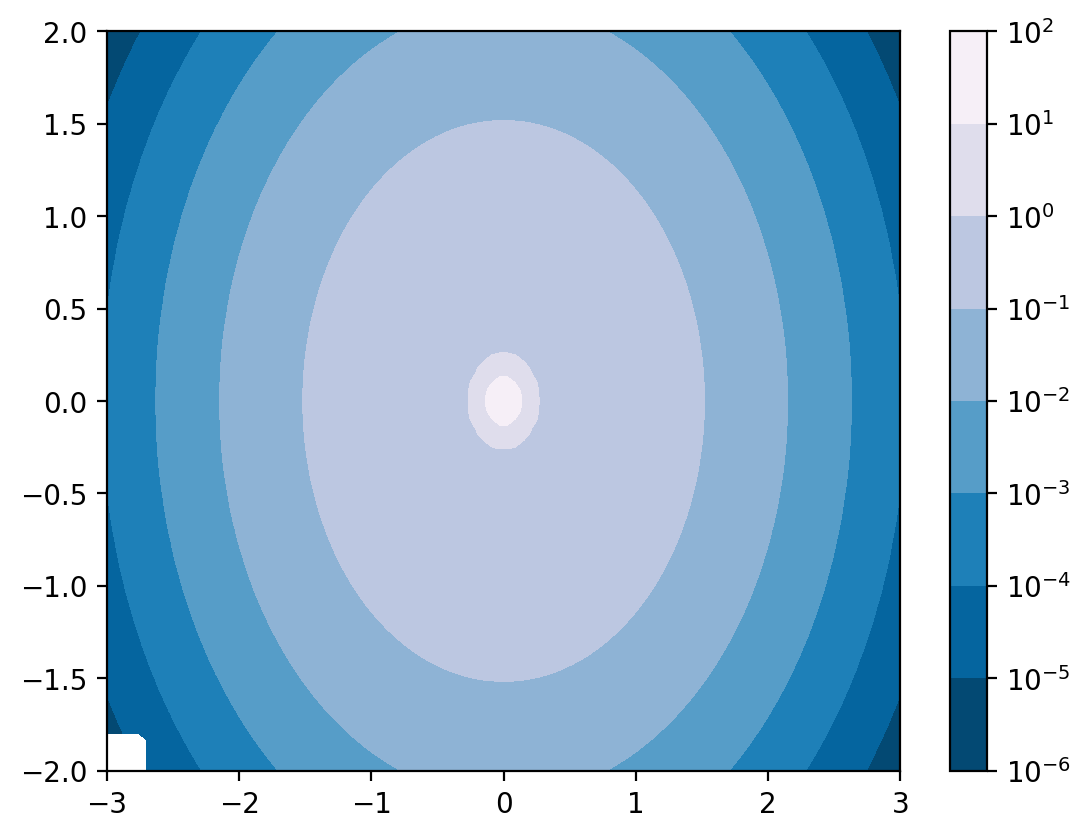

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

from matplotlib import cm, ticker

N = 100
x = np.linspace(-3.0, 3.0, N)
y = np.linspace(-2.0, 2.0, N)

X, Y = np.meshgrid(x, y)

# A low hump with a spike coming out.
# Needs to have z/colour axis on a log scale, so we see both hump and spike.
# A linear scale only shows the spike.
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
z = Z1 + 50 * Z2

# Put in some negative values (lower left corner) to cause trouble with logs:
z[:5, :5] = -1

# The following is not strictly essential, but it will eliminate
# a warning.  Comment it out to see the warning.
z = ma.masked_where(z <= 0, z)


# Automatic selection of levels works; setting the
# log locator tells contourf to use a log scale:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)

# Alternatively, you can manually set the levels
# and the norm:
# lev_exp = np.arange(np.floor(np.log10(z.min())-1),
#                    np.ceil(np.log10(z.max())+1))
# levs = np.power(10, lev_exp)
# cs = ax.contourf(X, Y, z, levs, norm=colors.LogNorm())

cbar = fig.colorbar(cs)

plt.show()

## my code

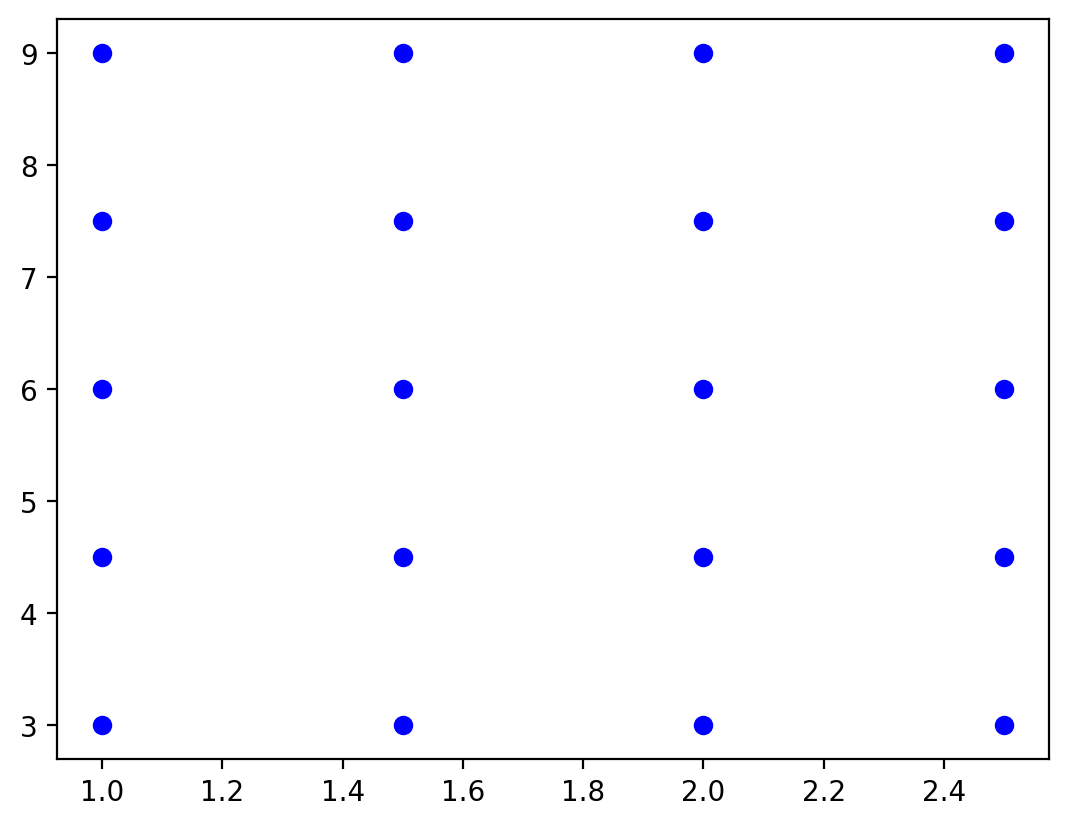

In [28]:
import matplotlib.pyplot as plt
import numpy as np

x, y = np.meshgrid(np.arange(1, 3, 0.5), np.arange(3, 10, 1.5))
plt.scatter(x, y, c='b')
plt.show()

In [29]:
x

array([[1. , 1.5, 2. , 2.5],
       [1. , 1.5, 2. , 2.5],
       [1. , 1.5, 2. , 2.5],
       [1. , 1.5, 2. , 2.5],
       [1. , 1.5, 2. , 2.5]])

In [30]:
y

array([[3. , 3. , 3. , 3. ],
       [4.5, 4.5, 4.5, 4.5],
       [6. , 6. , 6. , 6. ],
       [7.5, 7.5, 7.5, 7.5],
       [9. , 9. , 9. , 9. ]])

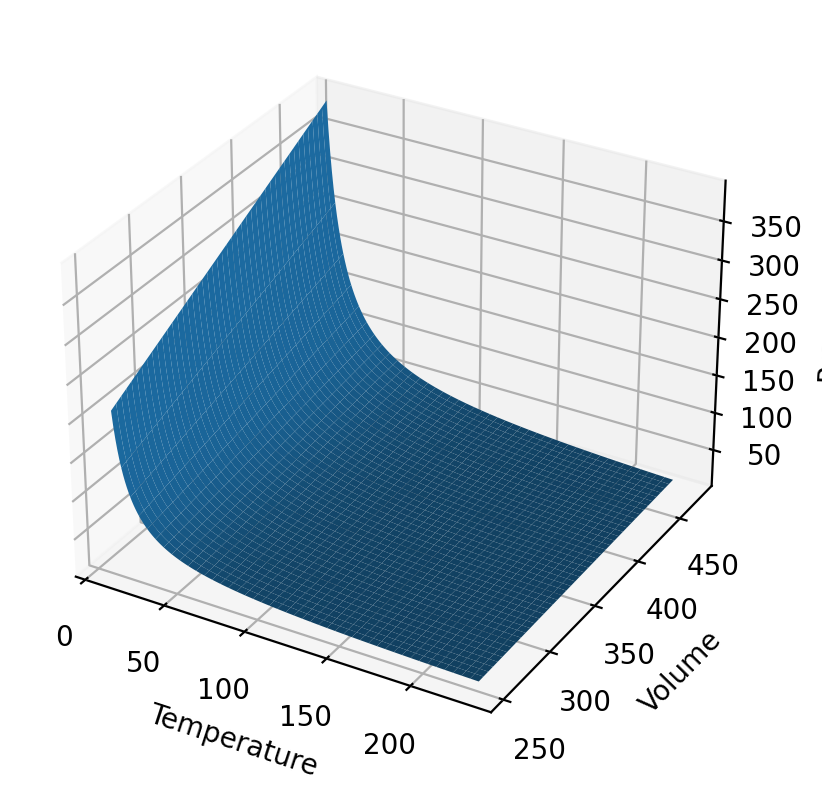

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

IdealGas = plt.figure()
PVT = plt.axes(projection='3d')
PVT.set_xlabel('Temperature')
PVT.set_ylabel('Volume')
PVT.set_zlabel('Pressure')

T = np.linspace(-20, 200, 221)
T += 273.15 
V = np.linspace(10, 231, 221)
Tx, Vy = np.meshgrid(T, V)

R = 8.314
P = R * Tx / Vy

PVT.plot_surface(Vy, Tx, P)
plt.show()

## np.mgrid

In [21]:
np.mgrid?

Type:        MGridClass
String form: <numpy.lib.index_tricks.MGridClass object at 0x0000019D6084BC40>
File:        c:\programdata\anaconda3\lib\site-packages\numpy\lib\index_tricks.py
Docstring:  
`nd_grid` instance which returns a dense multi-dimensional "meshgrid".

An instance of `numpy.lib.index_tricks.nd_grid` which returns an dense
(or fleshed out) mesh-grid when indexed, so that each returned argument
has the same shape.  The dimensions and number of the output arrays are
equal to the number of indexing dimensions.  If the step length is not a
complex number, then the stop is not inclusive.

However, if the step length is a **complex number** (e.g. 5j), then
the integer part of its magnitude is interpreted as specifying the
number of points to create between the start and stop values, where
the stop value **is inclusive**.

Returns
-------
mesh-grid `ndarrays` all of the same dimensions

See Also
--------
lib.index_tricks.nd_grid : class of `ogrid` and `mgrid` objects
ogrid : li

In [57]:
np.mgrid[0:5, 0:5]

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

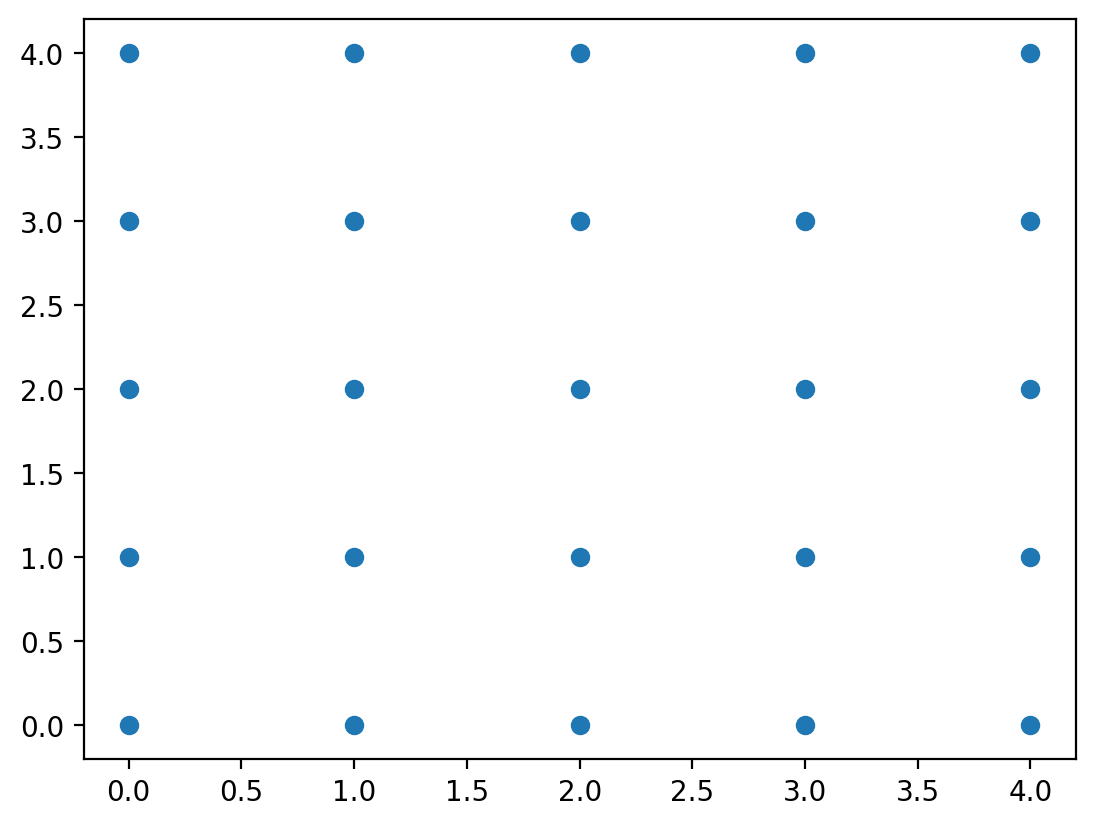

In [59]:
plt.scatter(np.mgrid[0:5, 0:5][0], np.mgrid[0:5, 0:5][1])
plt.show()

In [60]:
np.mgrid[-1:1:5j]

array([-1. , -0.5,  0. ,  0.5,  1. ])

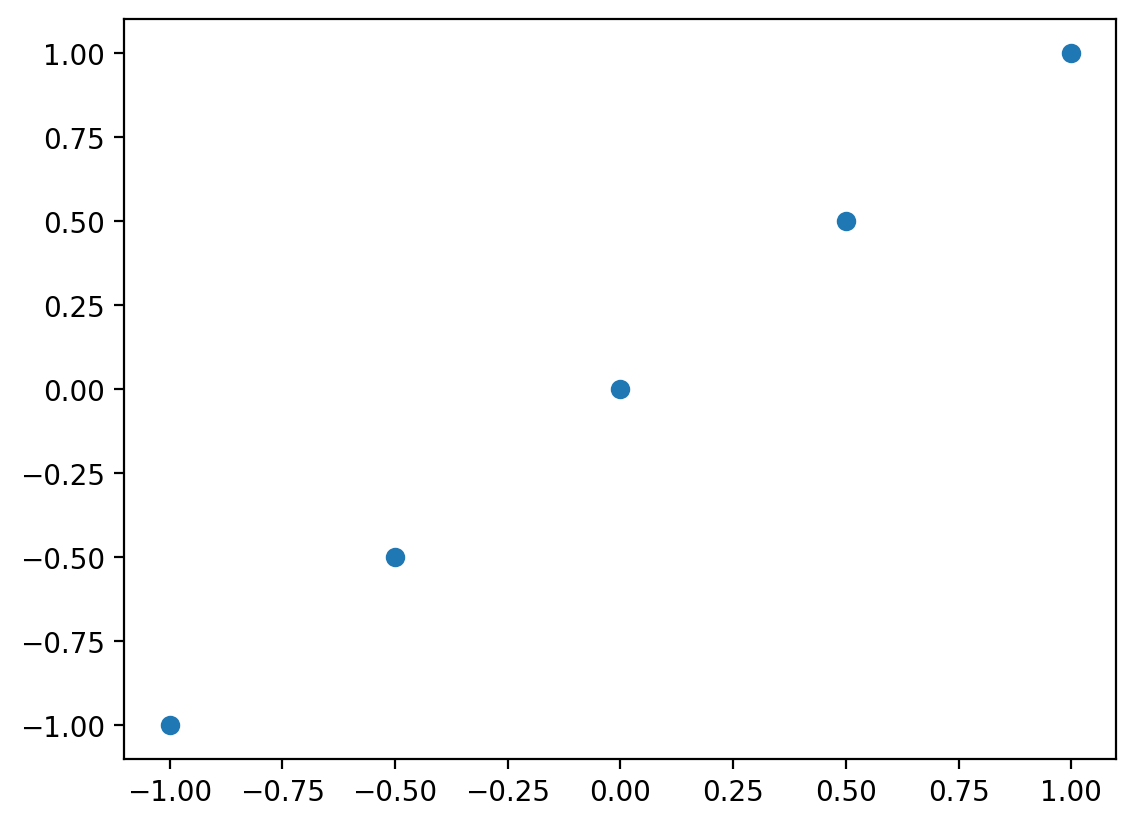

In [62]:
plt.scatter(np.mgrid[-1:1:5j], np.mgrid[-1:1:5j])
plt.show()

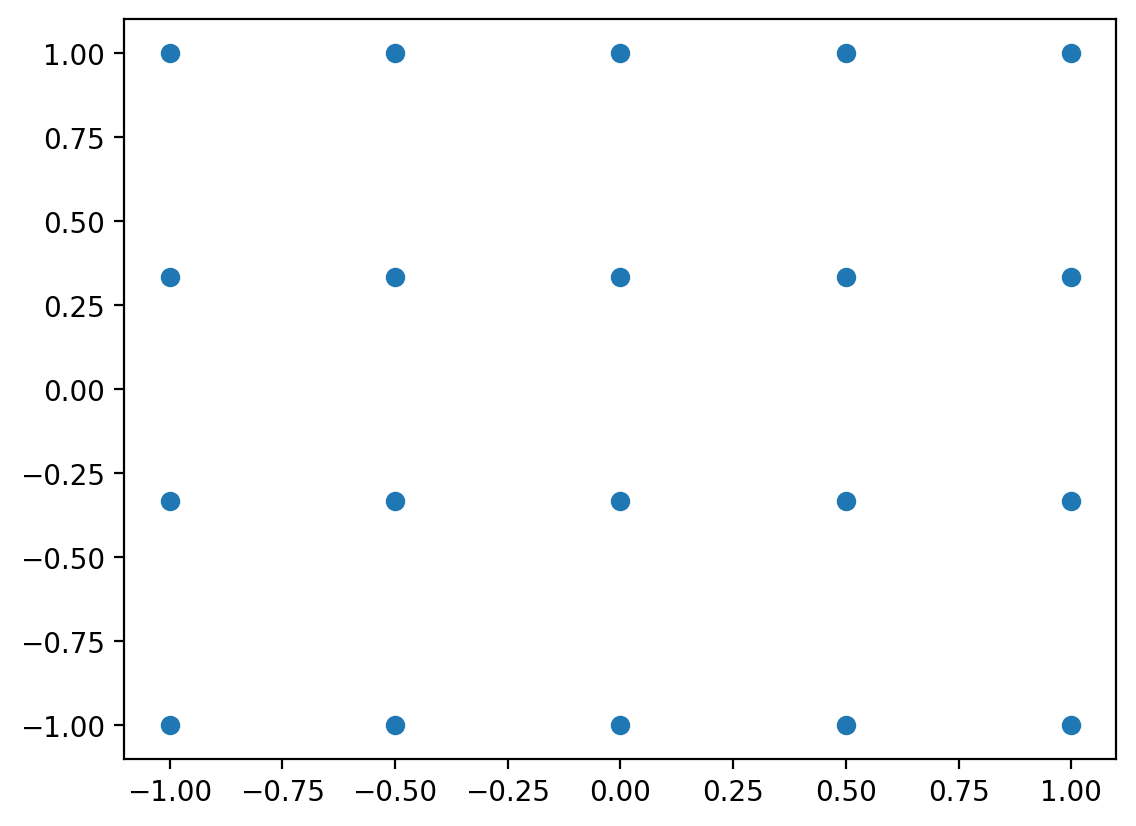

In [65]:
plt.scatter(np.mgrid[-1:1:5j, -1:1:4j][0], np.mgrid[-1:1:5j, -1:1:4j][1])
plt.show()

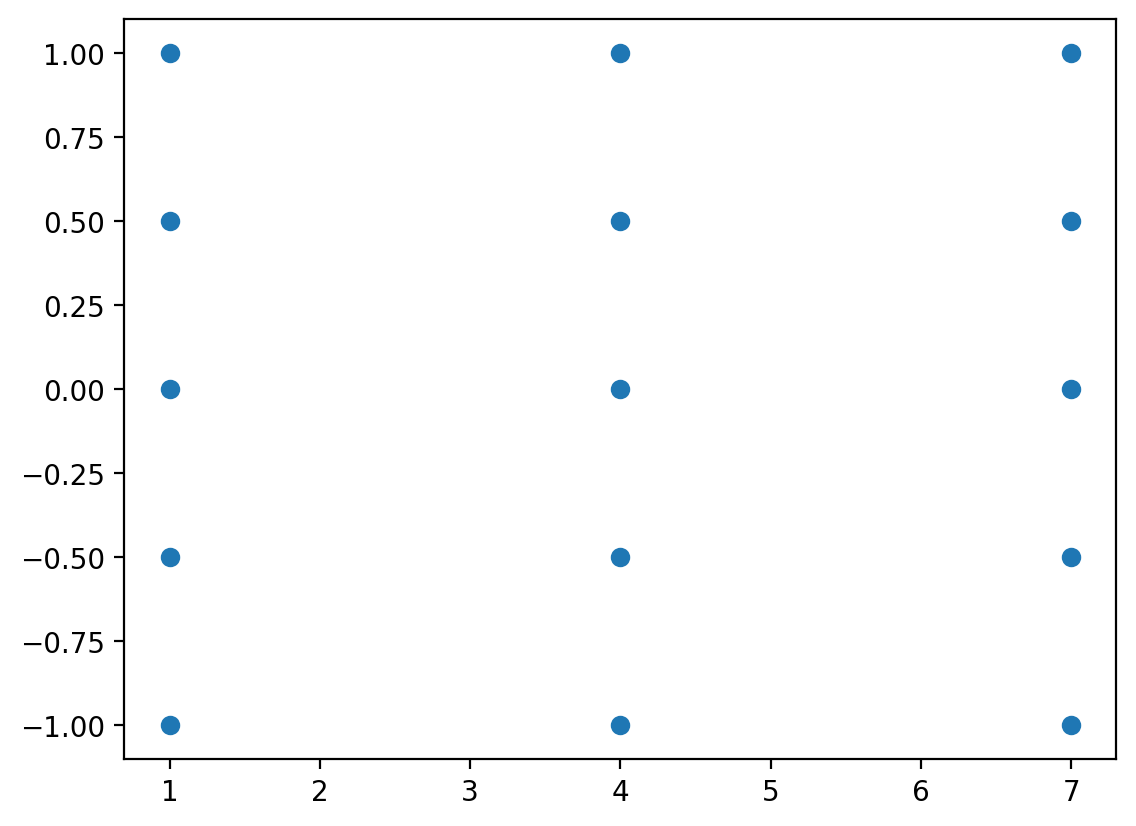

In [66]:
x, y = np.mgrid[1:10:3, -1:1:5j]

plt.scatter(x, y)
plt.show()

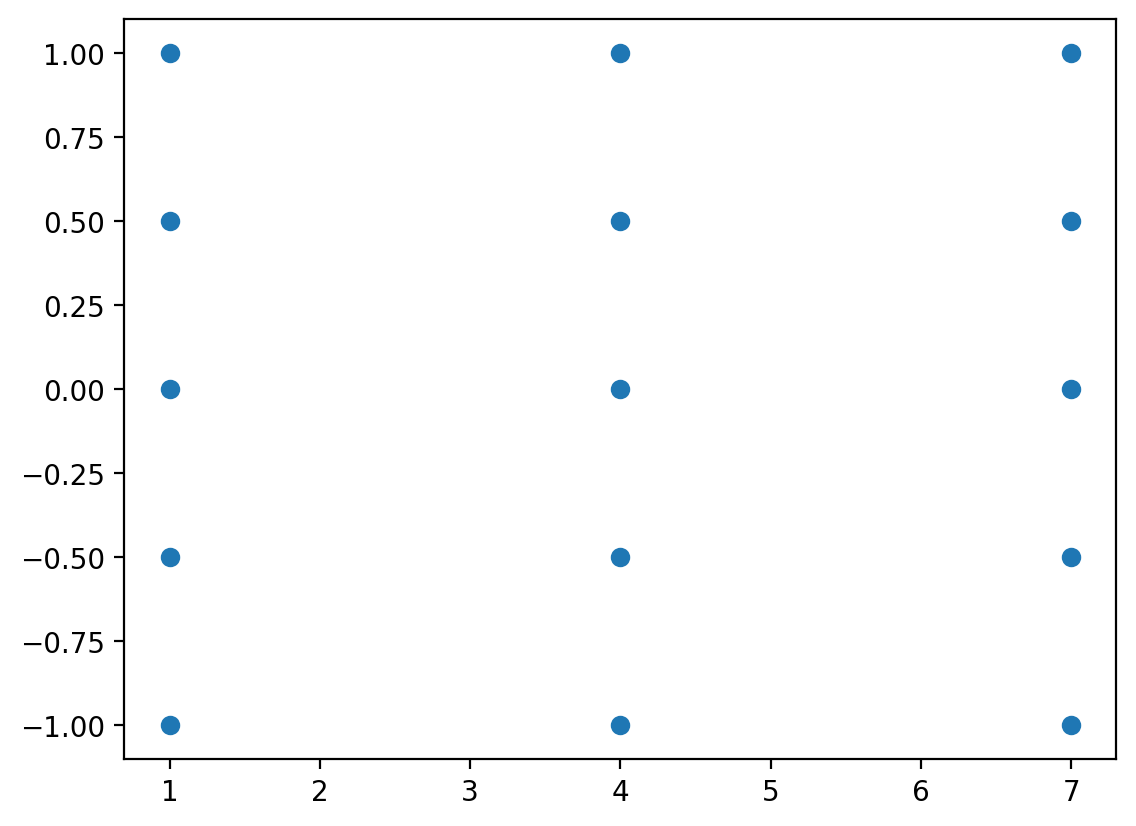

In [69]:
x, y = np.meshgrid(np.arange(1, 10, 3), np.linspace(-1, 1, 5))

plt.scatter(x, y)
plt.show()

## np.ogrid

In [81]:
np.meshgrid(np.arange(0, 5), np.arange(0, 5))

[array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]),
 array([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]])]

In [82]:
np.mgrid[-1:1:5j, -1:1:5j]

array([[[-1. , -1. , -1. , -1. , -1. ],
        [-0.5, -0.5, -0.5, -0.5, -0.5],
        [ 0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0.5,  0.5,  0.5,  0.5,  0.5],
        [ 1. ,  1. ,  1. ,  1. ,  1. ]],

       [[-1. , -0.5,  0. ,  0.5,  1. ],
        [-1. , -0.5,  0. ,  0.5,  1. ],
        [-1. , -0.5,  0. ,  0.5,  1. ],
        [-1. , -0.5,  0. ,  0.5,  1. ],
        [-1. , -0.5,  0. ,  0.5,  1. ]]])

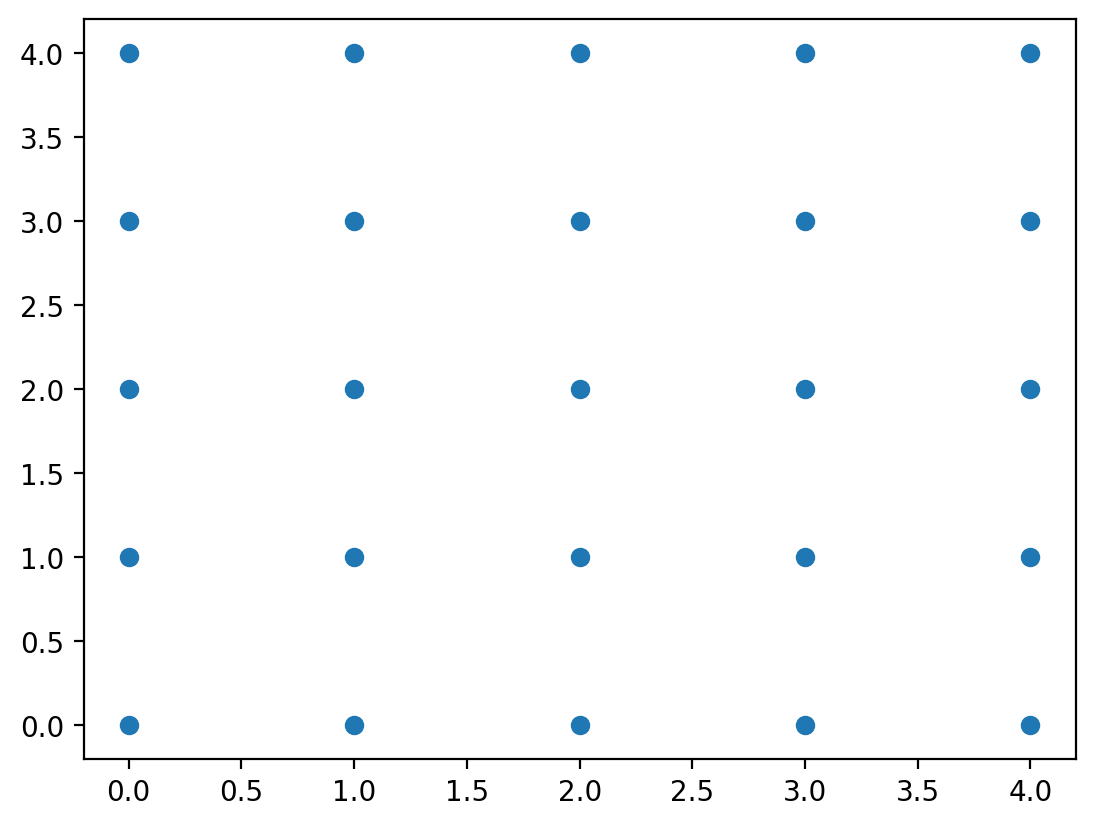

In [86]:
plt.scatter(np.mgrid[0:5, 0:5][0], np.mgrid[0:5, 0:5][1])


In [84]:
np.ogrid[0:5, 0:5]

[array([[0],
        [1],
        [2],
        [3],
        [4]]),
 array([[0, 1, 2, 3, 4]])]

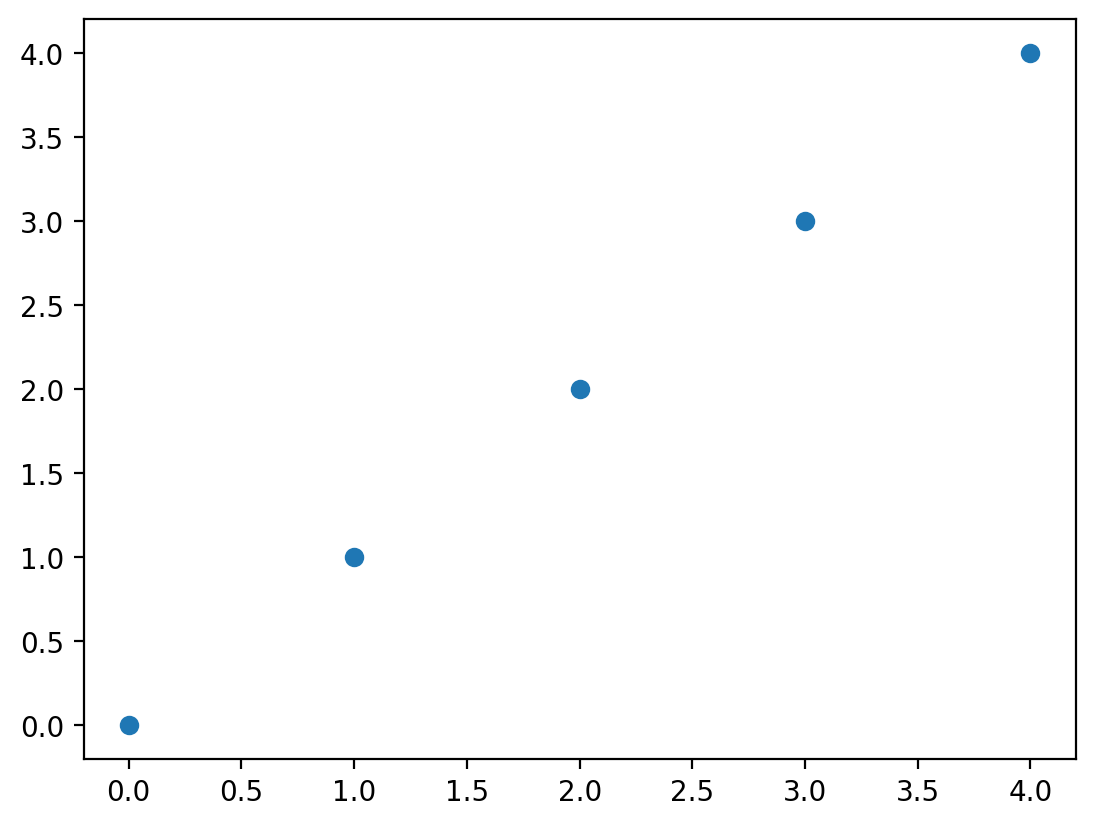

In [85]:
plt.scatter(np.ogrid[0:5, 0:5][0], np.ogrid[0:5, 0:5][1])


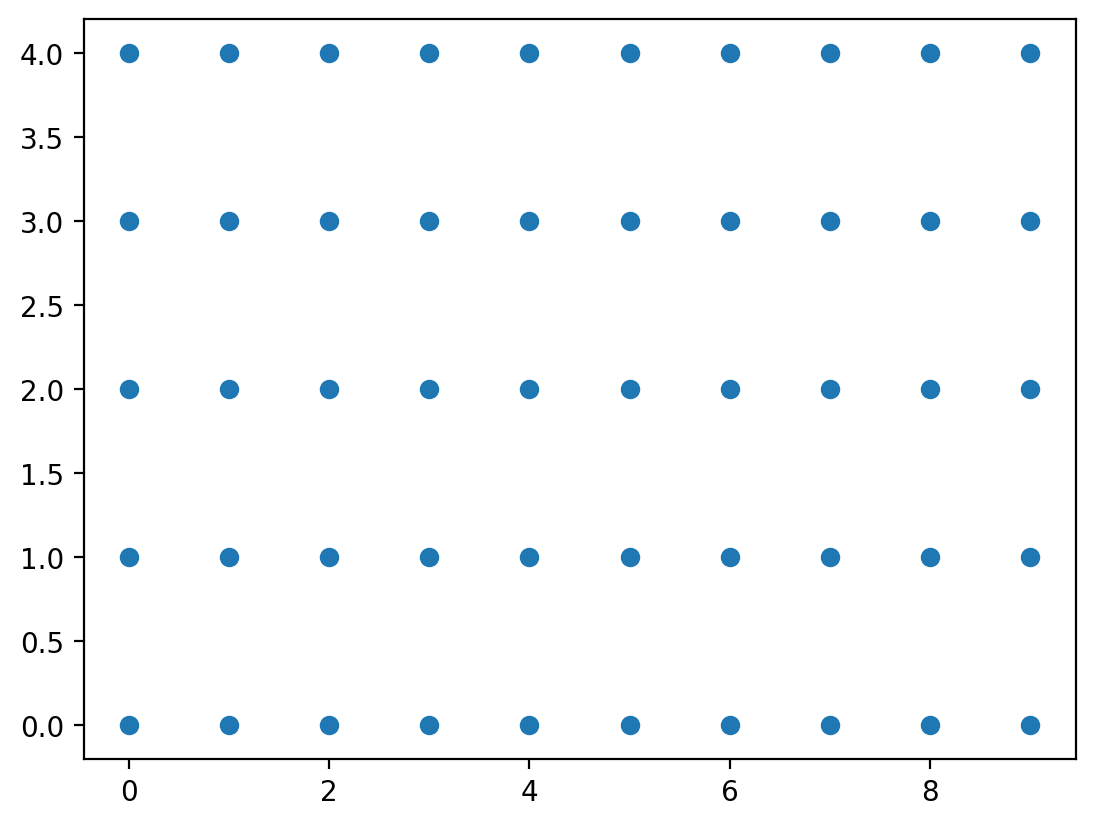

In [88]:
x, y = np.meshgrid(np.arange(0, 10), np.arange(0, 5))
plt.scatter(x, y)
plt.show()

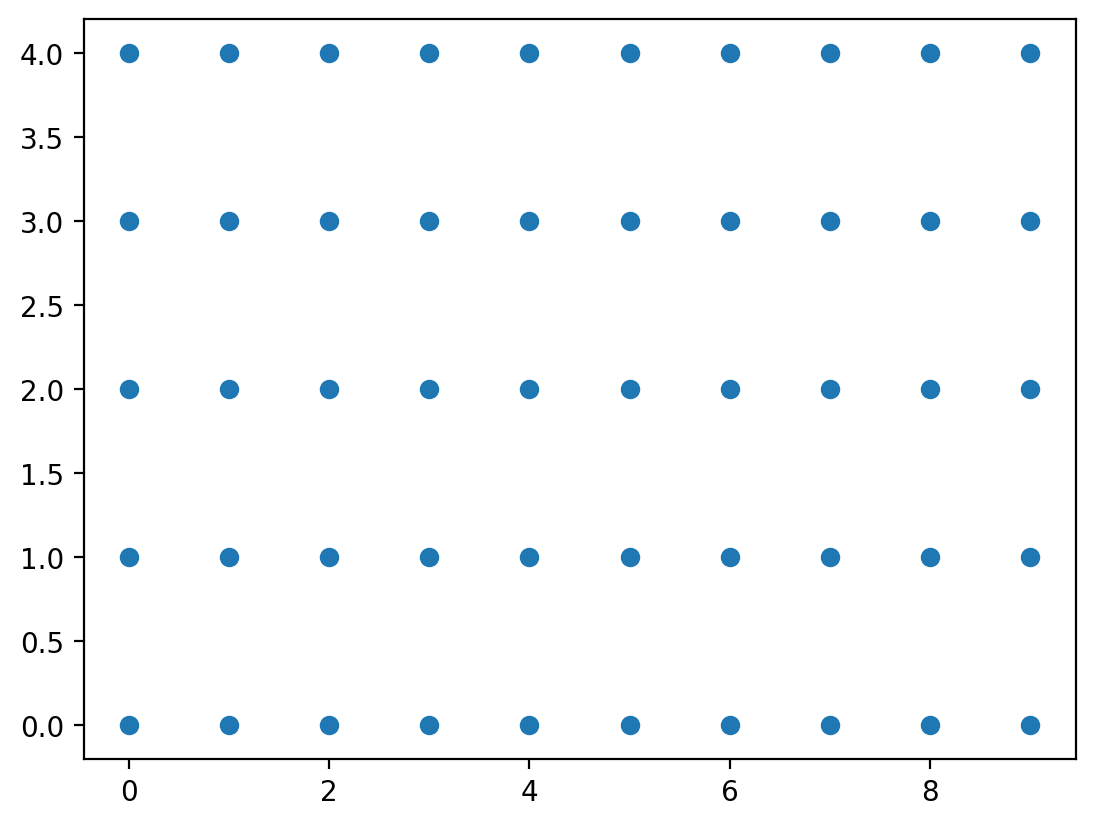

In [90]:
x, y = np.mgrid[0:10, 0:5]
plt.scatter(x, y)
plt.show()

In [92]:
x, y = np.ogrid[0:10, 0:5]
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]]),
 array([[0, 1, 2, 3, 4]]))

In [96]:
np.ogrid[0:10, 0:10, 0:10]

[array([[[0]],
 
        [[1]],
 
        [[2]],
 
        [[3]],
 
        [[4]],
 
        [[5]],
 
        [[6]],
 
        [[7]],
 
        [[8]],
 
        [[9]]]),
 array([[[0],
         [1],
         [2],
         [3],
         [4],
         [5],
         [6],
         [7],
         [8],
         [9]]]),
 array([[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]])]